<a href="https://colab.research.google.com/github/Bhairavsingh/ASL_Alphabets_Detection/blob/master/ASL_Alphabets_Classification_Rev_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Loading required libraries.
import pandas as pd
import numpy as np
import re
import string
from pprint import pprint
from collections import Counter
import keras
import os
import json
import sklearn
import csv

import tensorflow as tf
#!pip install tensorflow-gpu
#import tensorflow-gpu as tfg

from keras.datasets import imdb
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import regularizers
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras import layers
from keras.layers import LSTM
from keras.layers import LeakyReLU, UpSampling1D, Input, Reshape, Activation, Lambda, AveragePooling1D,AveragePooling2D
from keras.layers import Convolution2D, Dense, MaxPooling2D, Flatten, BatchNormalization, Dropout, Conv2DTranspose
from keras.models import Sequential
from keras.optimizers import RMSprop

import matplotlib.pyplot as plt
from matplotlib import image
#!pip install pypng
#import png
#!pip install Pillow
import PIL
from PIL import Image
from glob import glob

from numpy import save
from numpy import load
import time


In [ ]:


#Function for reading image paths and creating labels of images based on the folder names it is stored in.
def image_listing(directory):
  #Listing folder names from given directory.
  directory = directory + '/*/'
  Directory = glob(directory)
  File_names = []
  #Creating list of list of images stored in each folder of directory.
  for i in range(len(Directory)):
    Folders = Directory[i] + '*'
    File_names.append(glob(Folders))

  #Listing all file path in one list and creating a list of labels.
  file_path = []
  labels = []
  for i in range(len(File_names)):
    for j in range(len(File_names[i])):
      #Reading each file path.
      x = File_names[i][j]
      file_path.append(x)
      #Reading folder name where image is stored for labeling it.
      if x[62:65] == 'del':
        labels.append(x[62:65])
      elif x[62:67] == 'space':
        labels.append(x[62:67])
      elif x[62:69] == 'nothing':
        labels.append(x[62:69])
      else:
        labels.append(x[62])
  return file_path, labels



#Function for creating train, validation and testsets according to the given percentage values.
def set_creator(directory, trainset_percentage = 0.8, validationset_percentage = 0.1, testset_percentage = 0.1):
  #Reading path and labels of all images.
  file_names, labels = image_listing(directory)

  #Image names meta data.
  Data_A = file_names[15008 : 18007]
  Data_B = file_names[21008 : 24015]
  Data_C = file_names[27016 : 30023]
  Data_D = file_names[0 : 2999]
  Data_E = file_names[12008 : 15007]
  Data_F = file_names[18008 : 21007]
  Data_G = file_names[6000 : 9007]
  Data_H = file_names[24016 : 27015]
  Data_I = file_names[9008 : 12007]
  Data_J = file_names[33024 : 36023]
  Data_K = file_names[51024 : 54031]
  Data_L = file_names[45024 : 48023]
  Data_M = file_names[42024 : 45023]
  Data_N = file_names[57032 : 60031]
  Data_O = file_names[48024 : 51023]
  Data_P = file_names[54032 : 57031]
  Data_Q = file_names[30024 : 33023]
  Data_R = file_names[36024 : 39023]
  Data_S = file_names[63032 : 66031]
  Data_T = file_names[81032 : 84031]
  Data_U = file_names[66032 : 69031]
  Data_V = file_names[72032 : 75031]
  Data_W = file_names[84032 :]
  Data_X = file_names[78032 : 81031]
  Data_Y = file_names[60032 : 63031]
  Data_Z = file_names[75032 : 78031]
  Data_nothing = file_names[39024 : 42023]
  Data_del = file_names[3000 : 5999]
  Data_space = file_names[69032 : 72031]

  #Labels metadata.
  Labels_A = labels[15008 : 18007]
  Labels_B = labels[21008 : 24015]
  Labels_C = labels[27016 : 30023]
  Labels_D = labels[0 : 2999]
  Labels_E = labels[12008 : 15007]
  Labels_F = labels[18008 : 21007]
  Labels_G = labels[6000 : 9007]
  Labels_H = labels[24016 : 27015]
  Labels_I = labels[9008 : 12007]
  Labels_J = labels[33024 : 36023]
  Labels_K = labels[51024 : 54031]
  Labels_L = labels[45024 : 48023]
  Labels_M = labels[42024 : 45023]
  Labels_N = labels[57032 : 60031]
  Labels_O = labels[48024 : 51023]
  Labels_P = labels[54032 : 57031]
  Labels_Q = labels[30024 : 33023]
  Labels_R = labels[36024 : 39023]
  Labels_S = labels[63032 : 66031]
  Labels_T = labels[81032 : 84031]
  Labels_U = labels[66032 : 69031]
  Labels_V = labels[72032 : 75031]
  Labels_W = labels[84032 :]
  Labels_X = labels[78032 : 81031]
  Labels_Y = labels[60032 : 63031]
  Labels_Z = labels[75032 : 78031]
  Labels_nothing = labels[39024 : 42023]
  Labels_del = labels[3000 : 5999]
  Labels_space = labels[69032 : 72031]

  Data_file_meta_info = [Data_A, Data_B, Data_C, Data_D, Data_E, Data_F, Data_G, Data_H, Data_I, Data_J, Data_K, Data_L, Data_M, Data_N, Data_O, 
                        Data_P, Data_Q, Data_R, Data_S, Data_T, Data_U, Data_V, Data_W, Data_X, Data_Y, Data_Z, Data_nothing, Data_del, Data_space]

  Label_file_meta_info = [Labels_A, Labels_B, Labels_C, Labels_D, Labels_E, Labels_F, Labels_G, Labels_H, Labels_I, Labels_J, Labels_K, Labels_L, Labels_M, Labels_N, Labels_O, 
                          Labels_P, Labels_Q, Labels_R, Labels_S, Labels_T, Labels_U, Labels_V, Labels_W, Labels_X, Labels_Y, Labels_Z, Labels_nothing, Labels_del, Labels_space]

  #Declaring lists for all sets.
  train_file_names = []
  train_labels = []
  val_file_names = []
  val_labels = []
  test_file_names = []
  test_labels = []
  
  #Loop for equally extracting images and respective labels from each class.
  for i in range(len(Data_file_meta_info)):
    #Training value and validation value.
    train_value = int(len(Data_file_meta_info[i]) * trainset_percentage)
    val_value = train_value + int(len(Data_file_meta_info[i]) * validationset_percentage)
    #Train sets.
    train_file_names.extend(Data_file_meta_info[i][ : train_value])
    train_labels.extend(Label_file_meta_info[i][ : train_value])
    #Validation sets.
    val_file_names.extend(Data_file_meta_info[i][train_value : val_value])
    val_labels.extend(Label_file_meta_info[i][train_value : val_value])
    #Test sets.
    test_file_names.extend(Data_file_meta_info[i][val_value : ])
    test_labels.extend(Label_file_meta_info[i][val_value : ])
  return train_file_names, train_labels, val_file_names, val_labels, test_file_names, test_labels



#Function for reading the images.
def image_reader(image_path, normalizing_value = 255):
  #Reading image.
  data_raw = image.imread(image_path)
  #print(data_raw.dtype)
  #print(data_raw.shape)
  plt.imshow(data_raw)
  plt.show()
  #Normalizing the image array using max pixel value.
  normalized_data = np.array(data_raw/normalizing_value)
  return normalized_data



#Function for reading list of paths and reading images to get arrays.
def read_image_get_array(file_paths, normalizing_value = 255):
  lol = []
  for i in range(len(file_paths)):
    x = image_reader(file_paths[i], normalizing_value)
    lol.append(x)
  arrays = np.array(lol)
  return arrays



'''
#Reading all file path names and respective labels.
file_names, labels = image_listing(directory = '/content/drive/My Drive/Colab_Datasets/ASL/asl_alphabet_train')

#Writing the lyrics in a csv file!
#file = open('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Image_paths.csv','w+', encoding = 'utf-8', newline = '\n')
file = open('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Image_labels.csv','w+', encoding = 'utf-8', newline = '\n')
with file:
    objects = csv.writer(file)
    objects.writerows(labels)
file.close()
'''



#Index dictonary for classes and its key integer values.
meta_dict_classes = {'nothing' : 0, 'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'H' : 8, 'I' : 9, 'J' : 10, 'K' : 11, 'L' : 12, 'M' : 13, 
                       'N' : 14, 'O' : 15, 'P' : 16, 'Q' : 17, 'R' : 18, 'S' : 19, 'T' : 20, 'U' : 21, 'V' : 22, 'W' : 23, 'X' : 24, 'Y' : 25, 'Z' : 26, 'del' : 27, 'space' : 28}
#meta_pred_dict_classes = {value:key for key, value in meta_dict_classes.items()}
meta_pred_dict_classes = {0: 'nothing', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 
                          14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: 'del', 28: 'space'}


#Function for converting alphabets to key integers and converting to categorical array (one hot encodding).
def converting_to_intkeys(label_list, meta_dict_classes = meta_dict_classes):
  for n, i in enumerate(label_list):
    label_list[n] = meta_dict_classes[i]
  label_array = tf.keras.utils.to_categorical(label_list)
  return label_array


#Function for predicting given image using the trained model.
def predict_image(test_path, model, meta_pred_dict_classes = meta_pred_dict_classes):
  #Reading image and generating normalized numpy array.
  test_image = read_image_get_array(file_paths = [test_path], normalizing_value = 255)
  #Displaying image.
  plt.imshow(image.imread(test_path))
  plt.show()
  #Predicting class.
  result = model.predict(test_image)
  #Class integer key.
  predicted_class_key = np.argmax(result)
  #print(predicted_class_key)
  #Finding classes based on predefined dictonary.
  predicted_class = meta_pred_dict_classes[predicted_class_key]
  return predicted_class


#Function for predicting class of given image using class name and image number from database using trained model.
def customized_predict(class_name, image_number, model):
  test_path = '/content/drive/My Drive/Colab_Datasets/ASL/asl_alphabet_train/' + class_name + '/' + class_name + image_number + '.jpg'
  predicted_class = predict_image(test_path = test_path, model = model)
  print("Predicted class of above image is: ", predicted_class)
  return predicted_class




In [ ]:

#Creating meta set files.
train_file_names, train_labels, val_file_names, val_labels, test_file_names, test_labels = set_creator(directory = '/content/drive/My Drive/Colab_Datasets/ASL/asl_alphabet_train', 
                                                                                                       trainset_percentage = 0.2, validationset_percentage = 0.05, testset_percentage = 0.1)

print("Number of training image links: ", len(train_file_names))
print("Number of validation image links", len(val_file_names))


17380

4326

In [ ]:

#Converting theimages into numpy arrays.
start_time_new = time.time()
train_array_new = read_image_get_array(train_file_names, normalizing_value = 255)
end_time_new = time.time()
total_time_new = end_time_new - start_time_new
print(total_time_new)


start_time_new = time.time()
validation_array_new = read_image_get_array(val_file_names, normalizing_value = 255)
end_time_new = time.time()
total_time_new = end_time_new - start_time_new
print(total_time_new)


In [ ]:

#Storing numpy arrays for future use.
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_sample_17380.npy', train_array_new)
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/validation_array_4326.npy', validation_array_new)

#Converting labels to integer key and converting to one hot encodding.
train_categorical_labels = converting_to_intkeys(train_labels)
val_categorical_labels = converting_to_intkeys(val_labels)
#test_categorical_labels = converting_to_intkeys(test_labels)

#Converting label list into numpy array.
y_train = np.asarray(train_categorical_labels)
y_val = np.asarray(val_categorical_labels)
#y_test = np.asarray(test_categorical_labels)

#Storing numpy arrays of labels for future use.
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/y_train.npy', y_train)
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/y_val.npy', y_val)
#np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/y_test.npy', y_test)

#Loading stored numpy arrays for further use.
#train_array_new = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_sample_17380.npy')
#validation_array_new = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/validation_array_4326.npy')
#y_train = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/y_train.npy')
#y_val = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/y_val.npy')


#Printing shapes of all set and label arrays.
print("Shape of training set: ", train_array_new.shape)
print("Shape of training label array: ", y_train.shape, '\n')
print("Shape of validation set: ", validation_array_new.shape)
print("Shape of training label array: ", y_val.shape, '\n')
#print("Shape of testing set: ", testing_array.shape)
#print("Shape of training label array: ", y_test.shape)



(846, 200, 200, 3)


In [ ]:

#Reading training files to get np array in parts.
'''
#Reading training files to get np array part #1.
print("Processing training set #1...", '\n')
training_array_1 = read_image_get_array(train_file_names[: 10000], normalizing_value = 255)
print("Training set #1 is ready!", '\n')
#Printing shapes of all set and label arrays.
print("Shape of training set: ", training_array_1.shape)
#Saving the sets in numpy array for future use.
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_1.npy', training_array_1)


#Reading training files to get np array part #2.
print("Processing training set #2...", '\n')
training_array_2 = read_image_get_array(train_file_names[10000 : 20000], normalizing_value = 255)
print("Training set #2 is ready!", '\n')
#Printing shapes of all set and label arrays.
print("Shape of training set: ", training_array_2.shape)
#Saving the sets in numpy array for future use.
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_2.npy', training_array_2)


#Reading training files to get np array part #3.
print("Processing training set #3...", '\n')
training_array_3 = read_image_get_array(train_file_names[20000 : 30000], normalizing_value = 255)
print("Training set #3 is ready!", '\n')
#Printing shapes of all set and label arrays.
print("Shape of training set: ", training_array_3.shape)
#Saving the sets in numpy array for future use.
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_3.npy', training_array_3)


#Reading training files to get np array part #4.
print("Processing training set #4...", '\n')
training_array_4 = read_image_get_array(train_file_names[30000 : 40000], normalizing_value = 255)
print("Training set #4 is ready!", '\n')
#Printing shapes of all set and label arrays.
print("Shape of training set: ", training_array_4.shape)
#Saving the sets in numpy array for future use.
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_4.npy', training_array_4)


#Reading training files to get np array part #5.
print("Processing training set #5...", '\n')
training_array_5 = read_image_get_array(train_file_names[40000 : 50000], normalizing_value = 255)
print("Training set #5 is ready!", '\n')
#Printing shapes of all set and label arrays.
print("Shape of training set: ", training_array_5.shape)
#Saving the sets in numpy array for future use.
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_5.npy', training_array_5)


#Reading training files to get np array part #6.
print("Processing training set #6...", '\n')
training_array_6 = read_image_get_array(train_file_names[50000 : 60000], normalizing_value = 255)
print("Training set #6 is ready!", '\n')
#Printing shapes of all set and label arrays.
print("Shape of training set: ", training_array_6.shape)
#Saving the sets in numpy array for future use.
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_6.npy', training_array_6)


#Reading training files to get np array part #7.
print("Processing training set #7...", '\n')
training_array_7 = read_image_get_array(train_file_names[60000 : ], normalizing_value = 255)
print("Training set #7 is ready!", '\n')
#Printing shapes of all set and label arrays.
print("Shape of training set: ", training_array_7.shape)
#Saving the sets in numpy array for future use.
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_7.npy', training_array_7)


#Reading validation files to get np array.
print('\n', "Processing validation set...", '\n')
validation_array = read_image_get_array(val_file_names, normalizing_value = 255)
print("Validation set is ready!", '\n')
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/validation_array.npy', validation_array)


#Reading testing files to get np array.
#print('\n', "Processing testing set...", '\n')
#testing_array = read_image_get_array(test_file_names, normalizing_value = 255)
#print("Testing set is ready!", '\n')
np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/testing_array.npy', testing_array)
'''

#training_array_1 = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_1.npy', allow_pickle = True)
#training_array_2 = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_2.npy', allow_pickle = True)
#training_array_3 = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_3.npy', allow_pickle = True)
#training_array_4 = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_4.npy', allow_pickle = True)
#training_array_5 = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_5.npy', allow_pickle = True)
#training_array_6 = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_6.npy', allow_pickle = True)
#training_array_7 = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array_7.npy', allow_pickle = True)
#validation_array = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/validation_array.npy', allow_pickle = True)
#testing_array = np.load('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/testing_array.npy', allow_pickle = True)


#print("Shape of training #1 set: ", training_array_1.shape)
#print("Shape of training #2 set: ", training_array_2.shape)
#print("Shape of training #3 set: ", training_array_3.shape)
#print("Shape of training #4 set: ", training_array_4.shape)
#print("Shape of training #5 set: ", training_array_5.shape)
#print("Shape of training #6 set: ", training_array_6.shape)
#print("Shape of training #7 set: ", training_array_7.shape)
#print("Shape of validation set: ", validation_array.shape)
#print("Shape of testing set: ", testing_array.shape)

#print("Shape of original train set files", len(train_file_names))
#print("Shape of original validation set files", len(val_file_names))
#print("Shape of original test set files", len(test_file_names))


#Concatenating all training arrays in one array.
#training_array = np.concatenate((training_array_1, training_array_2, training_array_3, training_array_4, training_array_5, training_array_6, training_array_7), axis = 0)
#print("Shape of training set: ", training_array.shape)

#Storing concatenated parts of training sets for futurer use.
#np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array.npy', training_array.shape)

#Loading the storing concatenated parts of training sets for further use.
#np.save('/content/drive/My Drive/Colab_Datasets/ASL/ASL_Alphabet_Numpy_Data/training_array.npy', training_array.shape)
#print("Shape of training set: ", training_array.shape)


Shape of training #7 set:  (4,)
Shape of validation set:  (4,)


In [ ]:

#Model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(29, activation = 'softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0

In [ ]:

#Compiling the model.
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_array_new, y_train, 
                    epochs = 20, batch_size = 50,
                    validation_data = (validation_array_new, y_val))


Epoch 1/20
174/174 [==============================] - 357s 2s/step - loss: 1.6409 - accuracy: 0.5486 - val_loss: 1.3391 - val_accuracy: 0.6643
Epoch 2/20
174/174 [==============================] - 349s 2s/step - loss: 0.1519 - accuracy: 0.9574 - val_loss: 0.8863 - val_accuracy: 0.7801
Epoch 3/20
174/174 [==============================] - 350s 2s/step - loss: 0.0475 - accuracy: 0.9887 - val_loss: 1.6250 - val_accuracy: 0.7435
Epoch 4/20
174/174 [==============================] - 348s 2s/step - loss: 0.0444 - accuracy: 0.9920 - val_loss: 1.2475 - val_accuracy: 0.8061
Epoch 5/20
174/174 [==============================] - 369s 2s/step - loss: 0.0657 - accuracy: 0.9935 - val_loss: 1.4186 - val_accuracy: 0.8452
Epoch 6/20
174/174 [==============================] - 354s 2s/step - loss: 0.0604 - accuracy: 0.9927 - val_loss: 1.1729 - val_accuracy: 0.8522
Epoch 7/20
174/174 [==============================] - 363s 2s/step - loss: 0.0304 - accuracy: 0.9953 - val_loss: 1.2699 - val_accuracy: 0.8712

In [ ]:

#Evaluating the model.
test_loss, test_accuracy = model.evaluate(testing_array,  y_test, verbose = 2)
print("Model's Testset Accuracy", (100 * test_accuracy))


1/1 - 0s - loss: 0.1629 - accuracy: 0.9000
Model's Testset Accuracy 89.99999761581421


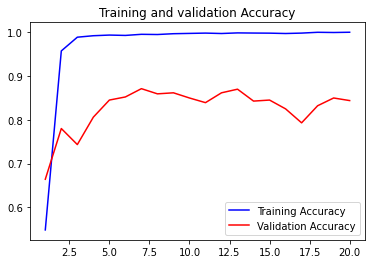

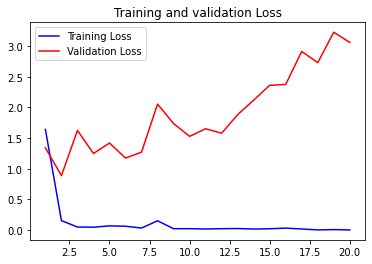

In [ ]:

#Plotting graph of accuracies and losses.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

#Plot for accuracies.
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()

#Plot for losses.
plt.plot(epochs, train_loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()



Actual Class:  A 



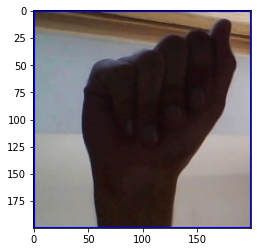

Predicted class of above image is:  A
Congratulation its predicting correctly!
#################################################### 

Actual Class:  A 



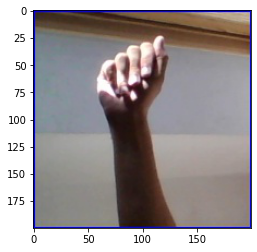

Predicted class of above image is:  B
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  A 



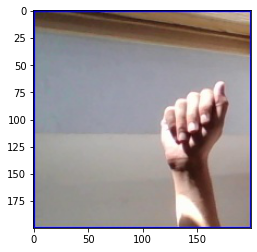

Predicted class of above image is:  F
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  A 



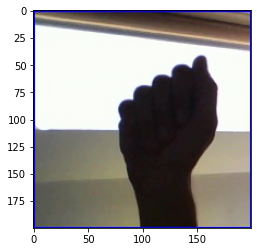

Predicted class of above image is:  A
Congratulation its predicting correctly!
#################################################### 

Actual Class:  B 



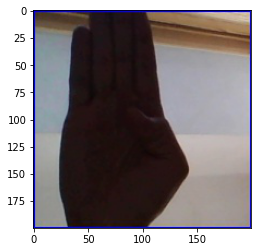

Predicted class of above image is:  B
Congratulation its predicting correctly!
#################################################### 

Actual Class:  B 



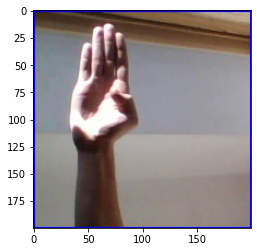

Predicted class of above image is:  D
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  B 



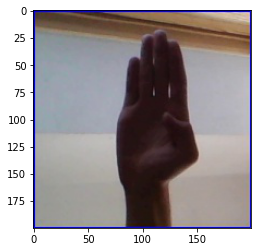

Predicted class of above image is:  B
Congratulation its predicting correctly!
#################################################### 

Actual Class:  B 



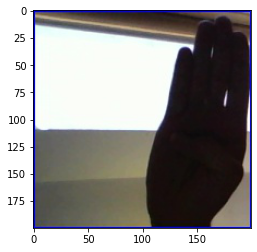

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  C 



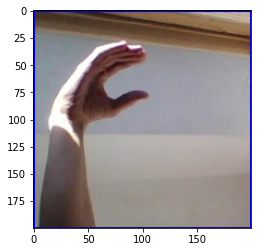

Predicted class of above image is:  nothing
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  C 



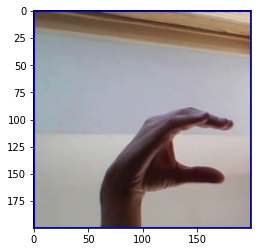

Predicted class of above image is:  D
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  C 



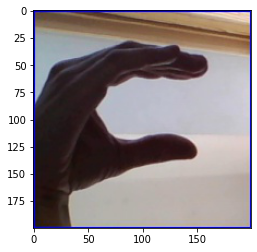

Predicted class of above image is:  C
Congratulation its predicting correctly!
#################################################### 

Actual Class:  C 



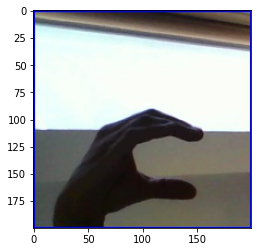

Predicted class of above image is:  D
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  D 



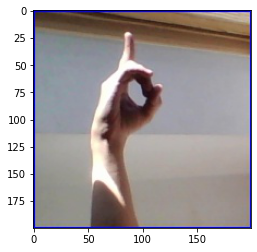

Predicted class of above image is:  C
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  D 



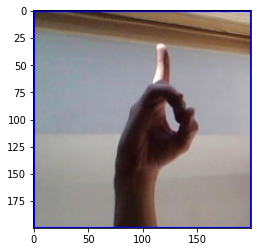

Predicted class of above image is:  D
Congratulation its predicting correctly!
#################################################### 

Actual Class:  D 



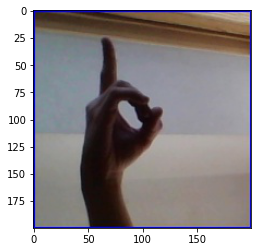

Predicted class of above image is:  D
Congratulation its predicting correctly!
#################################################### 

Actual Class:  D 



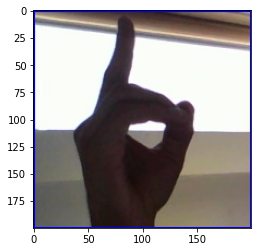

Predicted class of above image is:  L
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  E 



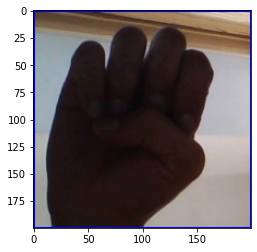

Predicted class of above image is:  D
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  E 



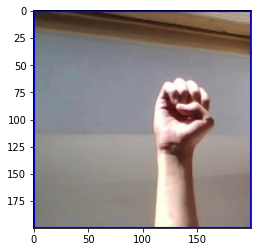

Predicted class of above image is:  E
Congratulation its predicting correctly!
#################################################### 

Actual Class:  E 



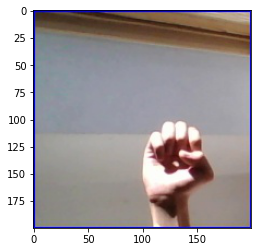

Predicted class of above image is:  F
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  E 



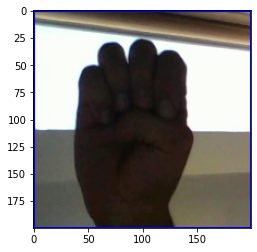

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  F 



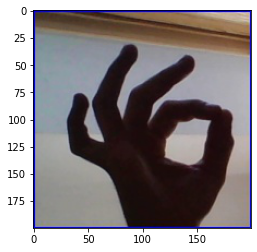

Predicted class of above image is:  F
Congratulation its predicting correctly!
#################################################### 

Actual Class:  F 



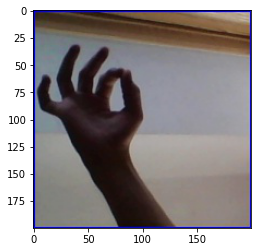

Predicted class of above image is:  E
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  F 



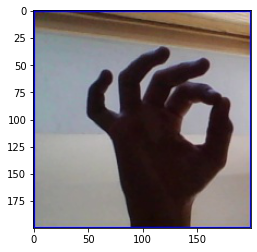

Predicted class of above image is:  F
Congratulation its predicting correctly!
#################################################### 

Actual Class:  F 



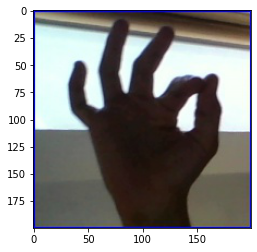

Predicted class of above image is:  I
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  G 



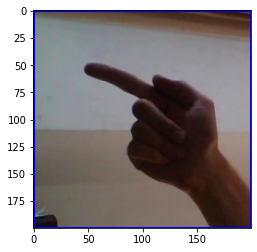

Predicted class of above image is:  G
Congratulation its predicting correctly!
#################################################### 

Actual Class:  G 



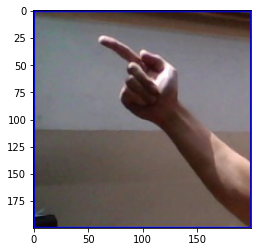

Predicted class of above image is:  H
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  G 



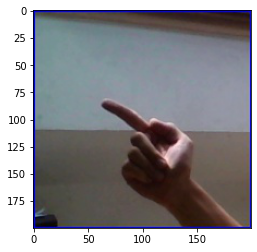

Predicted class of above image is:  H
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  G 



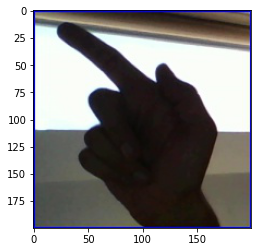

Predicted class of above image is:  J
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  H 



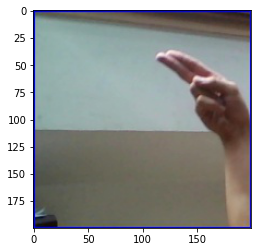

Predicted class of above image is:  J
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  H 



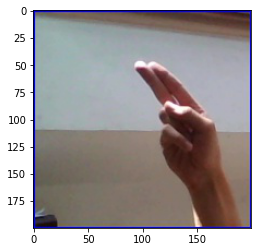

Predicted class of above image is:  H
Congratulation its predicting correctly!
#################################################### 

Actual Class:  H 



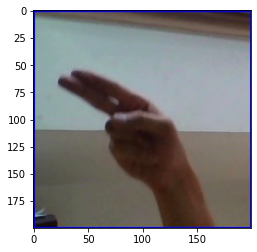

Predicted class of above image is:  H
Congratulation its predicting correctly!
#################################################### 

Actual Class:  H 



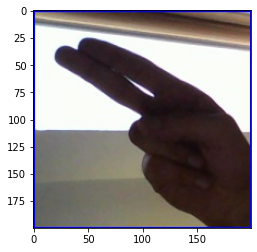

Predicted class of above image is:  N
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  I 



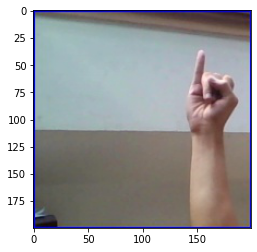

Predicted class of above image is:  J
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  I 



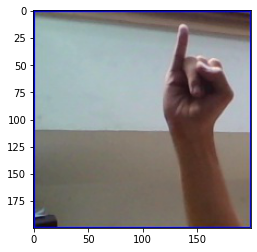

Predicted class of above image is:  I
Congratulation its predicting correctly!
#################################################### 

Actual Class:  I 



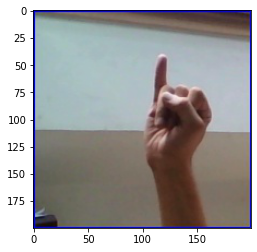

Predicted class of above image is:  I
Congratulation its predicting correctly!
#################################################### 

Actual Class:  I 



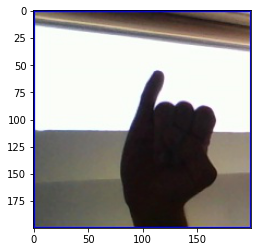

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  J 



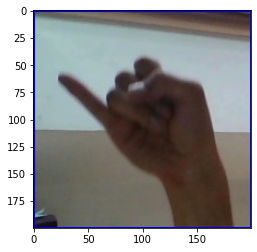

Predicted class of above image is:  H
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  J 



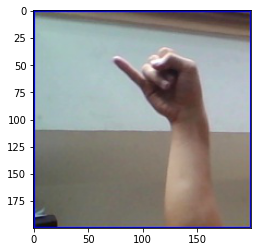

Predicted class of above image is:  I
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  J 



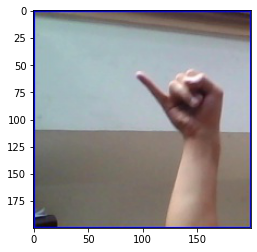

Predicted class of above image is:  I
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  J 



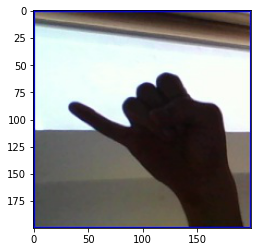

Predicted class of above image is:  H
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  K 



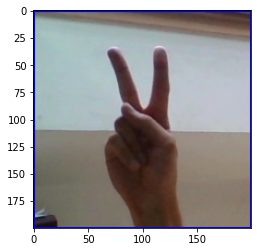

Predicted class of above image is:  K
Congratulation its predicting correctly!
#################################################### 

Actual Class:  K 



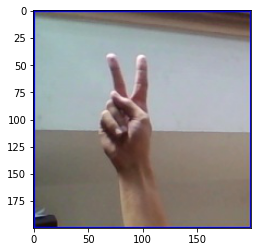

Predicted class of above image is:  K
Congratulation its predicting correctly!
#################################################### 

Actual Class:  K 



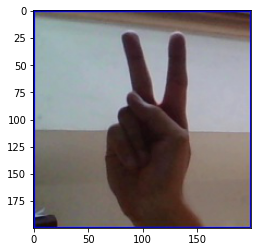

Predicted class of above image is:  K
Congratulation its predicting correctly!
#################################################### 

Actual Class:  K 



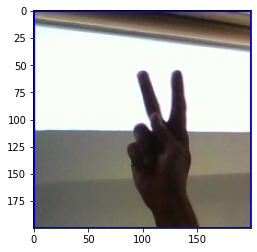

Predicted class of above image is:  V
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  L 



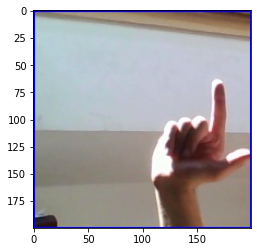

Predicted class of above image is:  O
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  L 



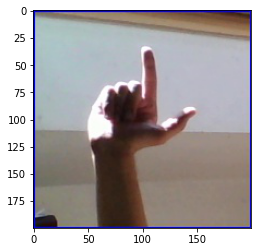

Predicted class of above image is:  L
Congratulation its predicting correctly!
#################################################### 

Actual Class:  L 



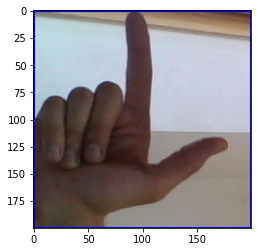

Predicted class of above image is:  L
Congratulation its predicting correctly!
#################################################### 

Actual Class:  L 



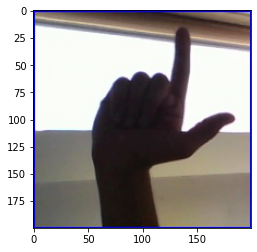

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  M 



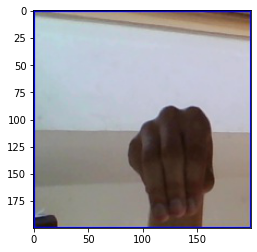

Predicted class of above image is:  O
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  M 



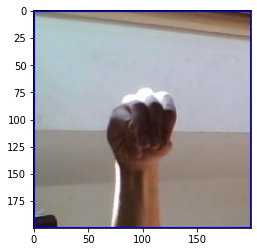

Predicted class of above image is:  L
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  M 



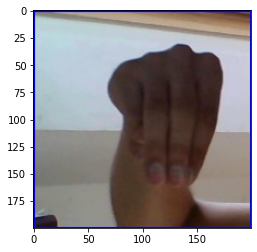

Predicted class of above image is:  N
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  M 



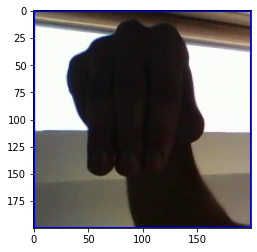

Predicted class of above image is:  B
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  N 



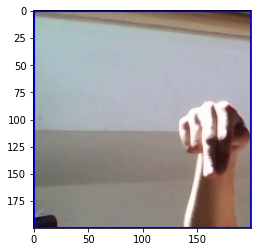

Predicted class of above image is:  T
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  N 



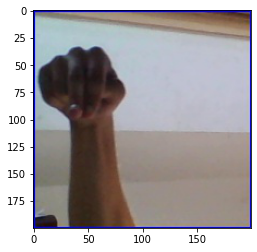

Predicted class of above image is:  N
Congratulation its predicting correctly!
#################################################### 

Actual Class:  N 



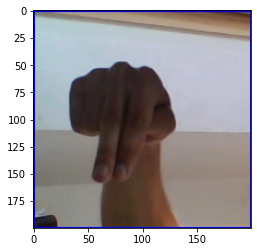

Predicted class of above image is:  N
Congratulation its predicting correctly!
#################################################### 

Actual Class:  N 



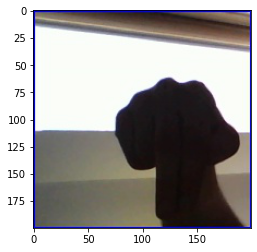

Predicted class of above image is:  J
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  O 



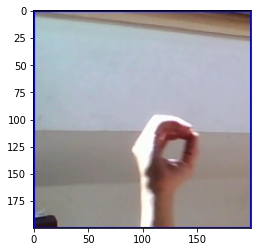

Predicted class of above image is:  O
Congratulation its predicting correctly!
#################################################### 

Actual Class:  O 



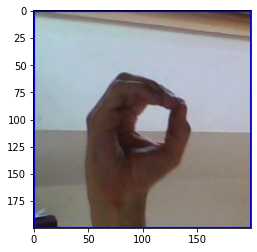

Predicted class of above image is:  T
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  O 



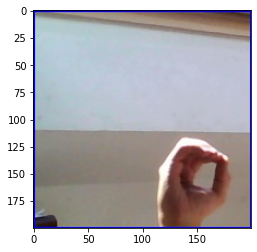

Predicted class of above image is:  Q
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  O 



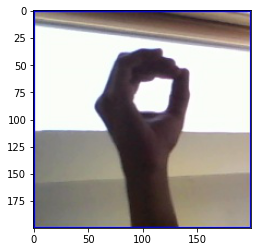

Predicted class of above image is:  E
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  P 



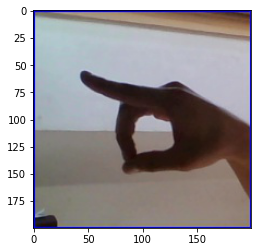

Predicted class of above image is:  P
Congratulation its predicting correctly!
#################################################### 

Actual Class:  P 



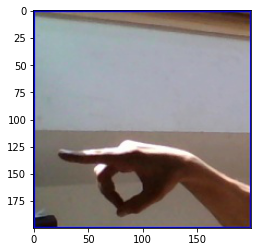

Predicted class of above image is:  J
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  P 



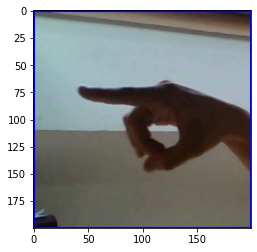

Predicted class of above image is:  P
Congratulation its predicting correctly!
#################################################### 

Actual Class:  P 



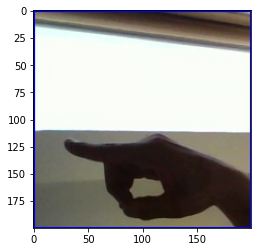

Predicted class of above image is:  J
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  Q 



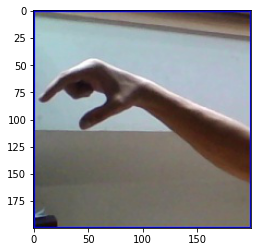

Predicted class of above image is:  T
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  Q 



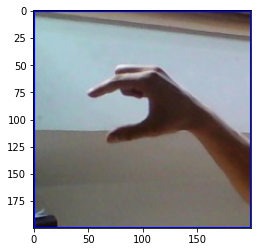

Predicted class of above image is:  T
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  Q 



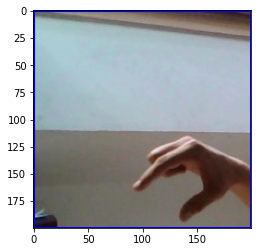

Predicted class of above image is:  Q
Congratulation its predicting correctly!
#################################################### 

Actual Class:  Q 



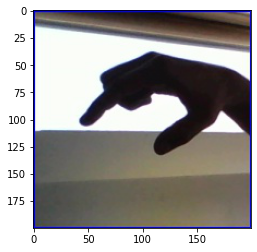

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  R 



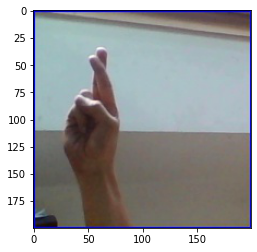

Predicted class of above image is:  Y
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  R 



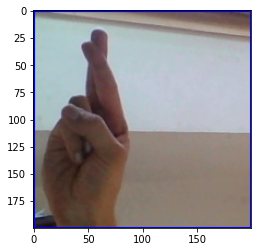

Predicted class of above image is:  U
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  R 



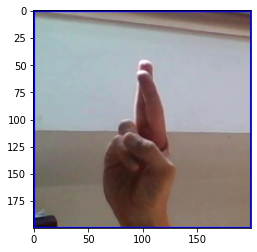

Predicted class of above image is:  R
Congratulation its predicting correctly!
#################################################### 

Actual Class:  R 



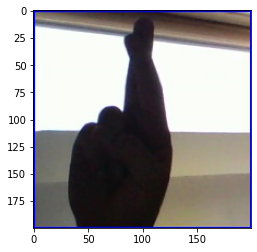

Predicted class of above image is:  L
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  S 



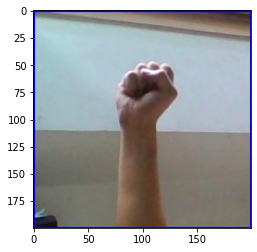

Predicted class of above image is:  S
Congratulation its predicting correctly!
#################################################### 

Actual Class:  S 



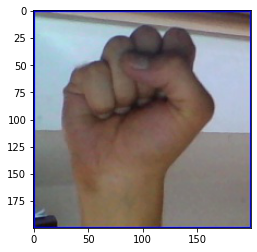

Predicted class of above image is:  U
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  S 



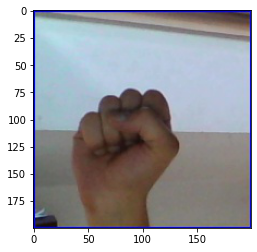

Predicted class of above image is:  S
Congratulation its predicting correctly!
#################################################### 

Actual Class:  S 



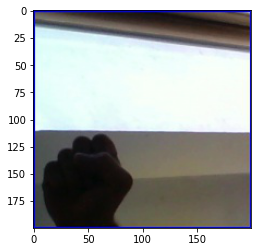

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  T 



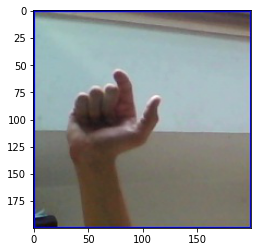

Predicted class of above image is:  T
Congratulation its predicting correctly!
#################################################### 

Actual Class:  T 



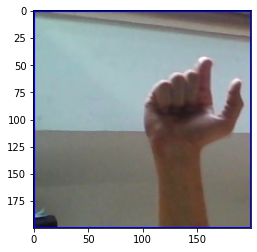

Predicted class of above image is:  S
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  T 



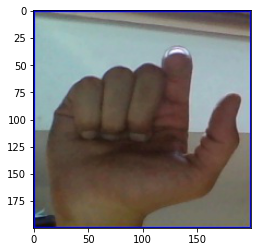

Predicted class of above image is:  T
Congratulation its predicting correctly!
#################################################### 

Actual Class:  T 



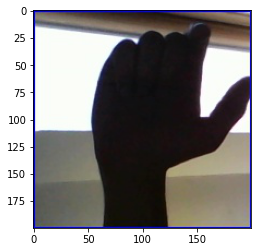

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  U 



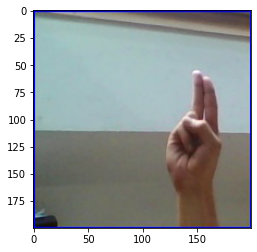

Predicted class of above image is:  X
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  U 



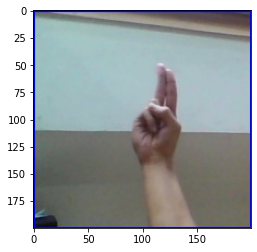

Predicted class of above image is:  U
Congratulation its predicting correctly!
#################################################### 

Actual Class:  U 



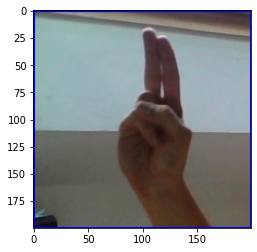

Predicted class of above image is:  U
Congratulation its predicting correctly!
#################################################### 

Actual Class:  U 



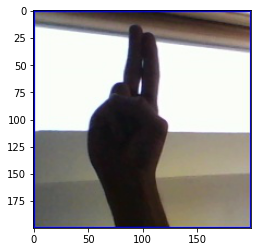

Predicted class of above image is:  E
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  V 



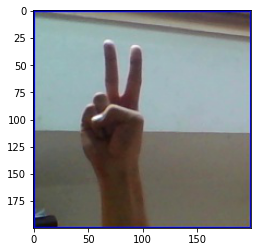

Predicted class of above image is:  V
Congratulation its predicting correctly!
#################################################### 

Actual Class:  V 



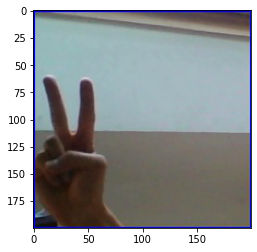

Predicted class of above image is:  space
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  V 



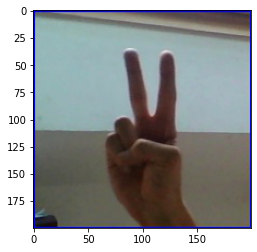

Predicted class of above image is:  R
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  V 



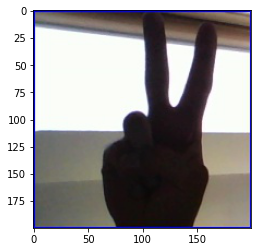

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  W 



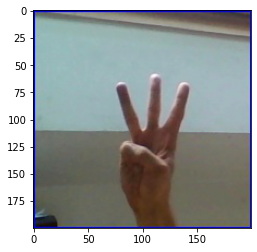

Predicted class of above image is:  V
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  W 



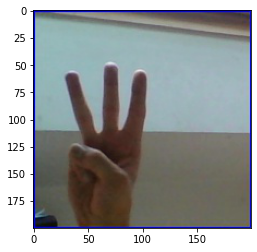

Predicted class of above image is:  W
Congratulation its predicting correctly!
#################################################### 

Actual Class:  W 



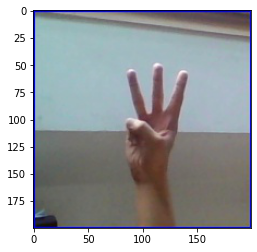

Predicted class of above image is:  W
Congratulation its predicting correctly!
#################################################### 

Actual Class:  W 



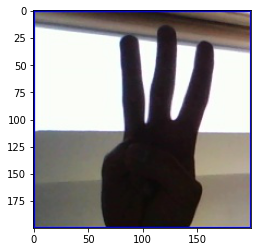

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  X 



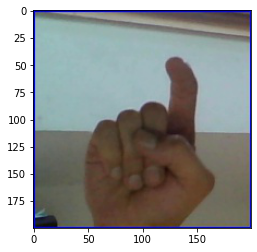

Predicted class of above image is:  X
Congratulation its predicting correctly!
#################################################### 

Actual Class:  X 



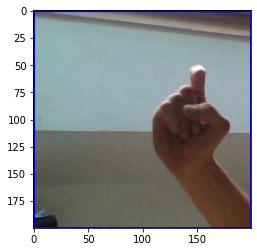

Predicted class of above image is:  Q
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  X 



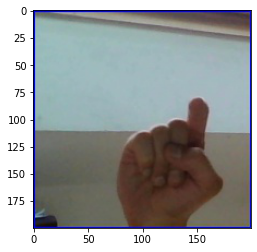

Predicted class of above image is:  X
Congratulation its predicting correctly!
#################################################### 

Actual Class:  X 



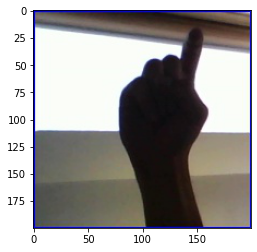

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  Y 



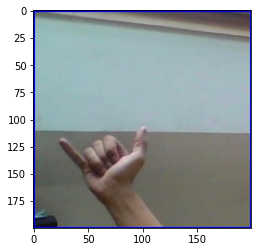

Predicted class of above image is:  Z
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  Y 



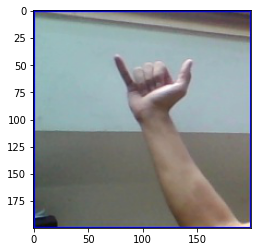

Predicted class of above image is:  Y
Congratulation its predicting correctly!
#################################################### 

Actual Class:  Y 



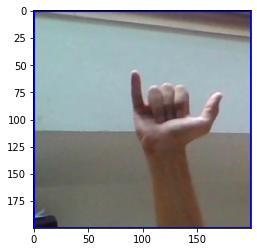

Predicted class of above image is:  T
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  Y 



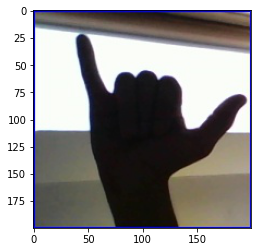

Predicted class of above image is:  A
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  Z 



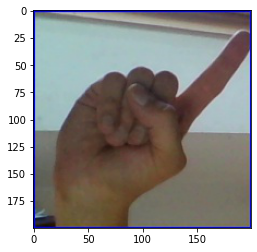

Predicted class of above image is:  Z
Congratulation its predicting correctly!
#################################################### 

Actual Class:  Z 



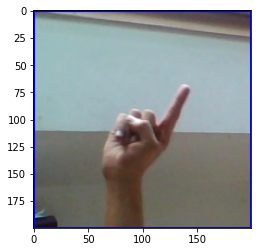

Predicted class of above image is:  Z
Congratulation its predicting correctly!
#################################################### 

Actual Class:  Z 



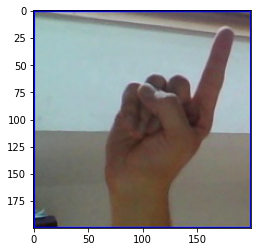

Predicted class of above image is:  Z
Congratulation its predicting correctly!
#################################################### 

Actual Class:  Z 



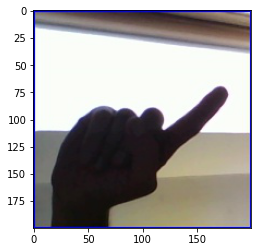

Predicted class of above image is:  L
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  del 



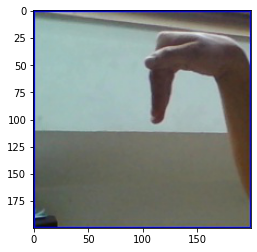

Predicted class of above image is:  U
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  del 



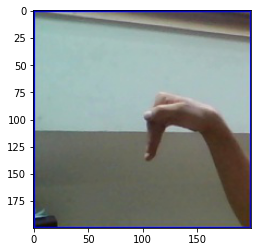

Predicted class of above image is:  del
Congratulation its predicting correctly!
#################################################### 

Actual Class:  del 



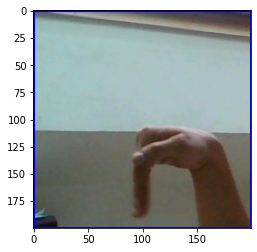

Predicted class of above image is:  del
Congratulation its predicting correctly!
#################################################### 

Actual Class:  del 



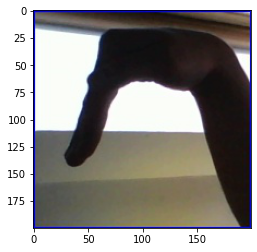

Predicted class of above image is:  Q
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  space 



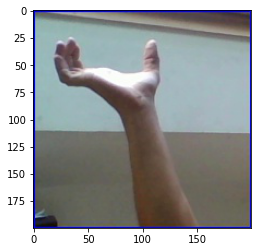

Predicted class of above image is:  Y
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  space 



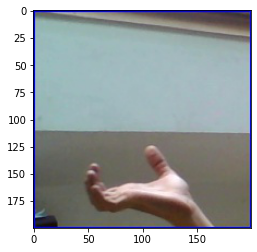

Predicted class of above image is:  Y
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  space 



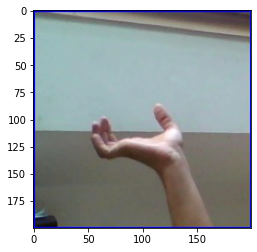

Predicted class of above image is:  space
Congratulation its predicting correctly!
#################################################### 

Actual Class:  space 



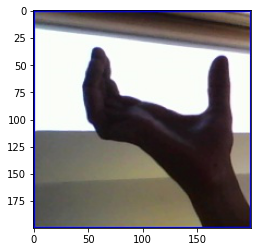

Predicted class of above image is:  J
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  nothing 



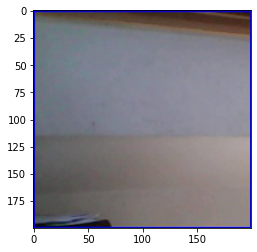

Predicted class of above image is:  K
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  nothing 



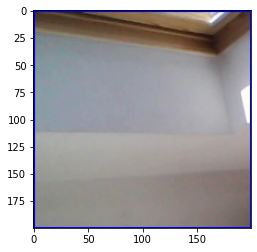

Predicted class of above image is:  nothing
Congratulation its predicting correctly!
#################################################### 

Actual Class:  nothing 



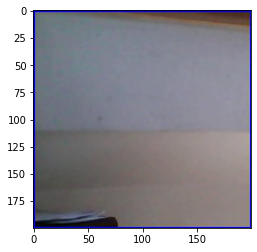

Predicted class of above image is:  K
Wrong prediction!!! Need to work more...
#################################################### 

Actual Class:  nothing 



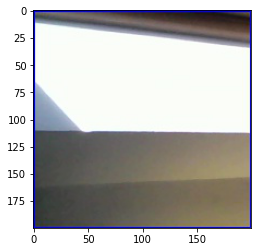

Predicted class of above image is:  U
Wrong prediction!!! Need to work more...
#################################################### 

Total number of predictions:  116
Number of correct predictions:  46
Number of wrong predictions:  70
Correct Prediction Accuracy:  39.6551724137931 %


In [ ]:

#Predicting single given image's class.
#Classes to be predicted.
ctcl = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'space', 'nothing']
#Image numbers
ctinl = ['222', '555', '1000', '2707']
#Initializing counters.
predictions_count = 0
correct_predictions_count = 0
wrong_predictions_count = 0
#Loop for all image predictions.
for i in range(len(ctcl)):
  for j in range(len(ctinl)):
    print("Actual Class: ", ctcl[i], '\n')
    predicted_class = customized_predict(class_name = ctcl[i], image_number = ctinl[j], model = model)
    predictions_count += 1
    if predicted_class == ctcl[i]:
      print("Congratulation its predicting correctly!")
      correct_predictions_count += 1
    else:
      print("Wrong prediction!!! Need to work more...")
      wrong_predictions_count += 1
    print("####################################################", '\n')
print("Total number of predictions: ", predictions_count)
print("Number of correct predictions: ", correct_predictions_count)
print("Number of wrong predictions: ", wrong_predictions_count)

prediction_accuracy = ((correct_predictions_count)/predictions_count) * 100
print("Correct Prediction Accuracy: ", prediction_accuracy, "%")



In [ ]:

#Save model.
model.save_weights('/content/drive/My Drive/Colab_Datasets/ASL/Models/model_2_sample_8676.h5')


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:

import image
import time


In [ ]:

len(val_file_names)


8676

In [ ]:

#Function for reading the images.
def image_reader_new(image_path, normalizing_value = 255):
  #Reading image.
  with Image.open(image_path) as image:         
    im_arr = np.fromstring(image.tobytes(), dtype=np.uint8)
    im_arr = im_arr.reshape((image.size[1], image.size[0], 3)) 
  normalized_data = np.array(im_arr/normalizing_value)
  return normalized_data



#Function for reading list of paths and reading images to get arrays.
def read_image_get_array_new(file_paths, normalizing_value = 255):
  lol = []
  for i in range(len(file_paths)):
    x = image_reader_new(file_paths[i], normalizing_value)
    lol.append(x)
  arrays = np.array(lol)
  return arrays


In [ ]:

start_time_old = time.time()

validation_array_old_1 = read_image_get_array(val_file_names[:1000], normalizing_value = 255)
end_time_old = time.time()
total_time_old = end_time_old - start_time_old
print(total_time_old)

validation_array_old_2 = read_image_get_array(val_file_names[1000 : 2000], normalizing_value = 255)
end_time_old = time.time()
total_time_old = end_time_old - start_time_old
print(total_time_old)

validation_array_old_3 = read_image_get_array(val_file_names[2000 : 3000], normalizing_value = 255)
end_time_old = time.time()
total_time_old = end_time_old - start_time_old
print(total_time_old)



4.920197248458862
9.421630382537842
13.568538427352905


In [ ]:

start_time_old = time.time()

validation_array_old_4 = read_image_get_array(val_file_names[3000 : 4000], normalizing_value = 255)
end_time_old = time.time()
total_time_old = end_time_old - start_time_old
print(total_time_old)

validation_array_old_5 = read_image_get_array(val_file_names[4000 : 5000], normalizing_value = 255)
end_time_old = time.time()
total_time_old = end_time_old - start_time_old
print(total_time_old)

validation_array_old_6 = read_image_get_array(val_file_names[5000 : 6000], normalizing_value = 255)
end_time_old = time.time()
total_time_old = end_time_old - start_time_old
print(total_time_old)



4.617347240447998
175.8748676776886
887.4691865444183


In [ ]:

start_time_old = time.time()

validation_array_old_7 = read_image_get_array(val_file_names[6000 : 7000], normalizing_value = 255)
end_time_old = time.time()
total_time_old = end_time_old - start_time_old
print(total_time_old)

validation_array_old_8 = read_image_get_array(val_file_names[7000 : 8000], normalizing_value = 255)
end_time_old = time.time()
total_time_old = end_time_old - start_time_old
print(total_time_old)

validation_array_old_9 = read_image_get_array(val_file_names[8000 : ], normalizing_value = 255)
end_time_old = time.time()
total_time_old = end_time_old - start_time_old
print(total_time_old)



712.587607383728
1411.1435537338257


KeyboardInterrupt: ignored

In [ ]:

start_time_new = time.time()
validation_array_new = read_image_get_array_new(val_file_names[:1000], normalizing_value = 255)
end_time_new = time.time()

total_time_new = end_time_new - start_time_new
total_time_new


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


4.814345598220825

In [ ]:

val_file_names[27]



'/content/drive/My Drive/Colab_Datasets/ASL/asl_alphabet_train/A/A1705.jpg'

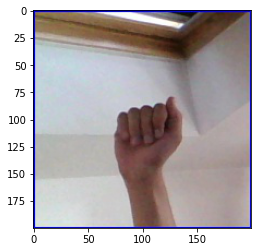

(200, 200, 3)
[[[  0   3 251]
  [  1   6 255]
  [  0   0 252]
  ...
  [  4   0 253]
  [  0   0 253]
  [  0   7 255]]

 [[  0   5 255]
  [  1   0 231]
  [ 17   6 196]
  ...
  [ 17   2 179]
  [ 15   9 207]
  [  0   3 235]]

 [[  0   1 254]
  [ 13   3 196]
  [122 108 183]
  ...
  [112  98 131]
  [ 97  88 193]
  [ 11   7 208]]

 ...

 [[  5   0 255]
  [  8   9 187]
  [209 221 255]
  ...
  [177 171 157]
  [170 169 237]
  [  7   7 191]]

 [[  0   0 253]
  [  5   8 209]
  [199 209 255]
  ...
  [168 169 236]
  [156 161 255]
  [  0   7 199]]

 [[  0   4 255]
  [  0   4 240]
  [  0   5 209]
  ...
  [  5   5 189]
  [  3  12 201]
  [  0   9 220]]]


In [ ]:

normalizing_value = 255

data_raw = Image.open(val_file_names[27])
data_np = np.array(data_raw)
plt.imshow(data_raw)
plt.show()
print(data_np.shape)
print(data_np)
#Normalizing the image array using max pixel value.
normalized_data = np.array(data_np/normalizing_value)

